In [1]:
import os

import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm


import sys
sys.path.append('../')
from scripts.get_s2_data_ee import get_history, get_history_polygon, get_pixel_vectors

%load_ext autoreload
%autoreload 2

In [2]:
# Configuration:
# Set directory where training site json files are located and files are saved
# Set rect width for all patches that are not TPA sites
rect_width = 0.0053
site_coords = [115.349542, -8.562821]
name = 'temesi'

In [3]:
patch_history = get_history([site_coords], 
                            [name], 
                            rect_width,
                            num_months = 2,
                            start_date = '2020-10-01')

  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:04<00:04,  4.74s/it]

100%|██████████| 2/2 [00:12<00:00,  6.07s/it]


In [4]:
site_data = patch_history['2020-11-01']['temesi']

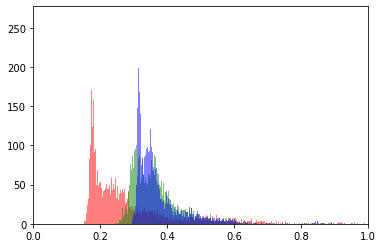

In [5]:
gamma = 1
edges, bins, patches = plt.hist((site_data['B4'].flatten() / 3000) ** gamma, 
                                bins=400, color='r', alpha=0.5)
plt.hist((site_data['B3'].flatten() / 3000) ** gamma, bins=bins, color='g', alpha=0.5)
plt.hist((site_data['B2'].flatten() / 3000) ** gamma, bins=bins, color='b', alpha=0.5)
plt.xlim([0, 1])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


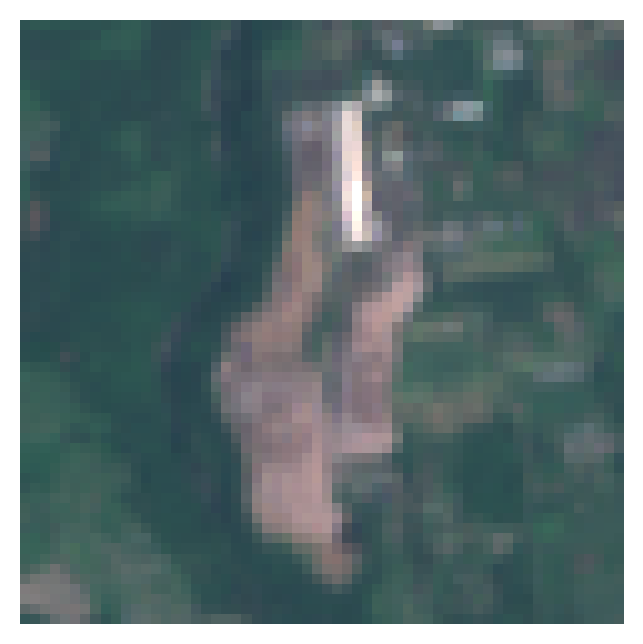

In [6]:
rgb = np.stack((site_data['B4'],
                site_data['B3'],
                site_data['B2']), axis=-1)
plt.figure(dpi=200)
plt.imshow((rgb/3000) ** 1, vmin=0, vmax=0.55)
plt.axis('off')
plt.show()

In [7]:
# Sentinel 2 band descriptions
band_descriptions = {
    'B1': 'Aerosols, 442nm',
    'B2': 'Blue, 492nm',
    'B3': 'Green, 559nm',
    'B4': 'Red, 665nm',
    'B5': 'Red Edge 1, 704nm',
    'B6': 'Red Edge 2, 739nm',
    'B7': 'Red Edge 3, 779nm',
    'B8': 'NIR, 833nm',
    'B8A': 'Red Edge 4, 864nm',
    'B9': 'Water Vapor, 943nm',
    'B11': 'SWIR 1, 1610nm',
    'B12': 'SWIR 2, 2186nm'
}

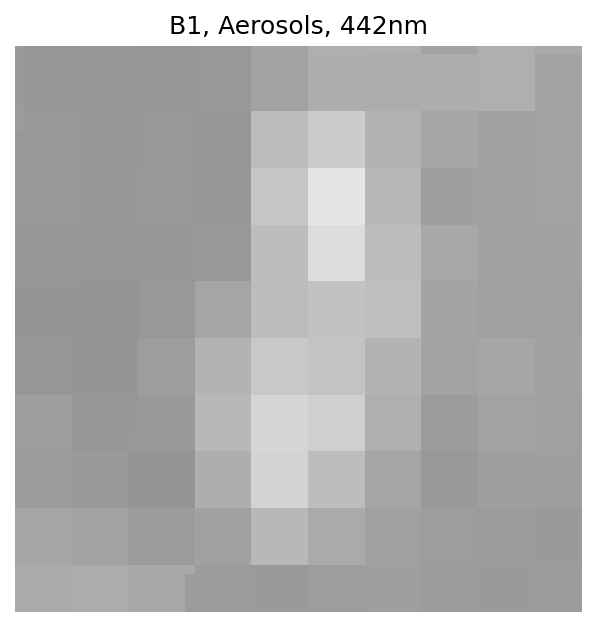

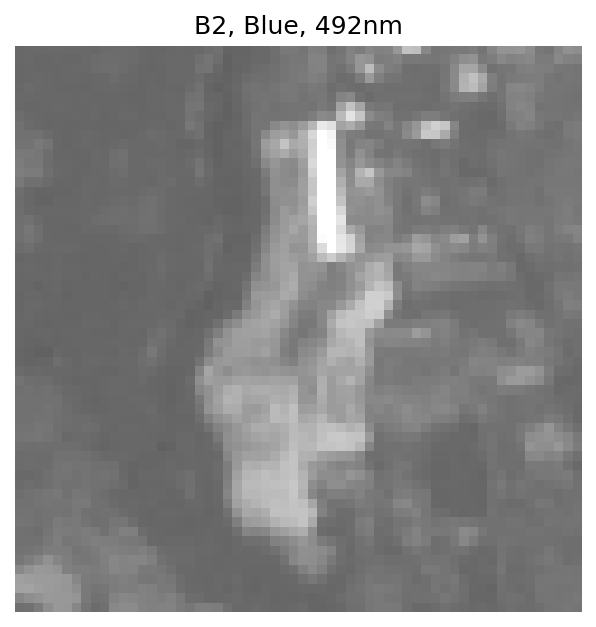

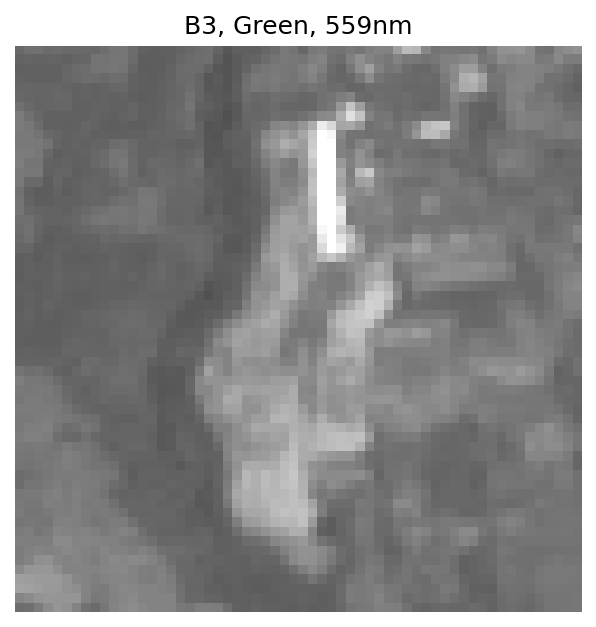

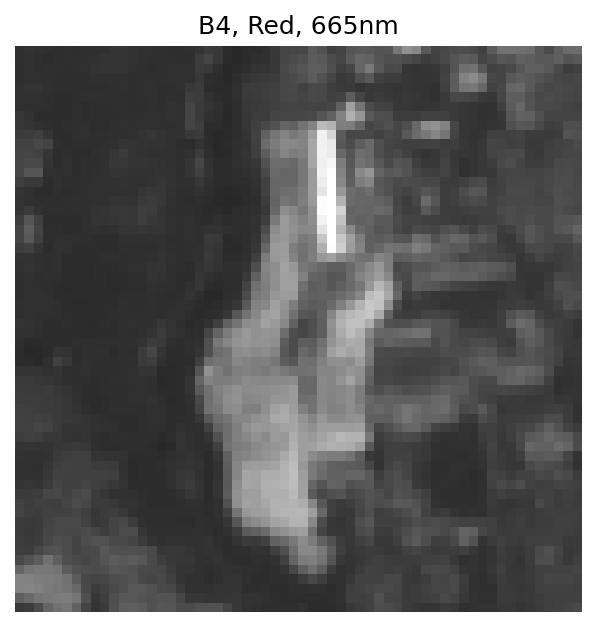

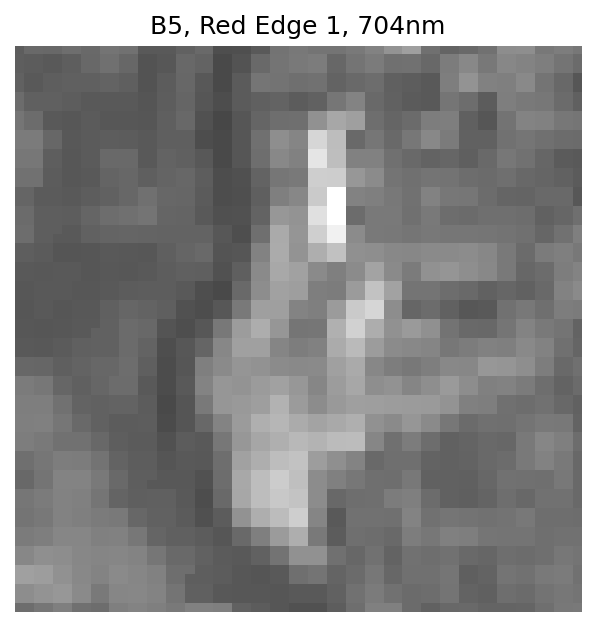

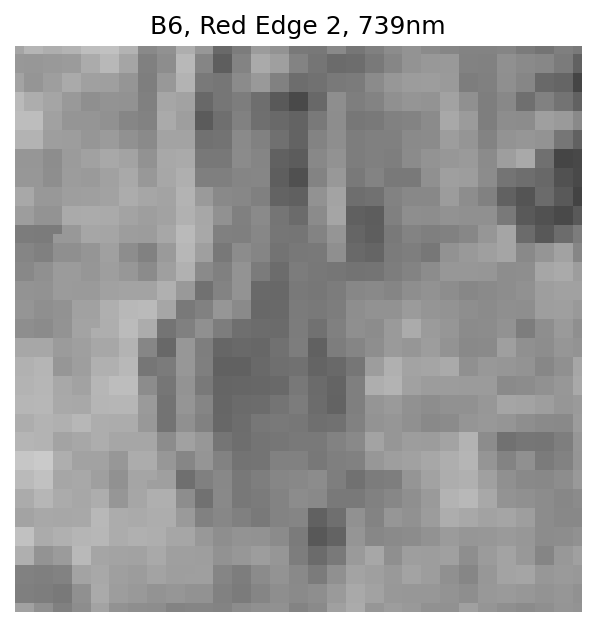

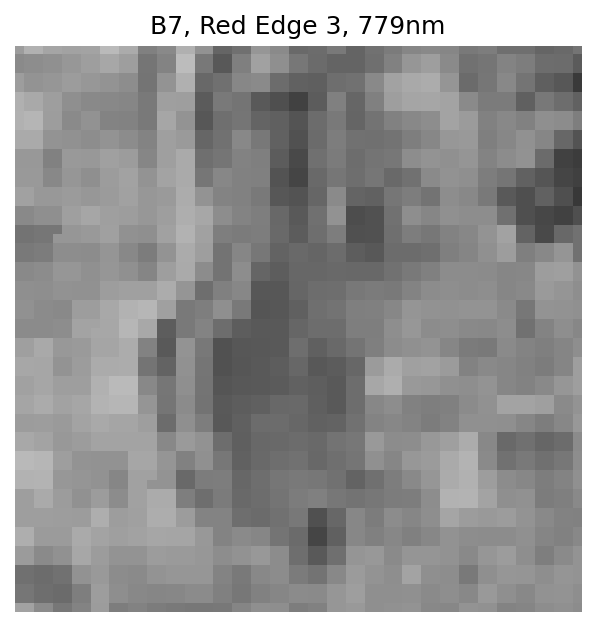

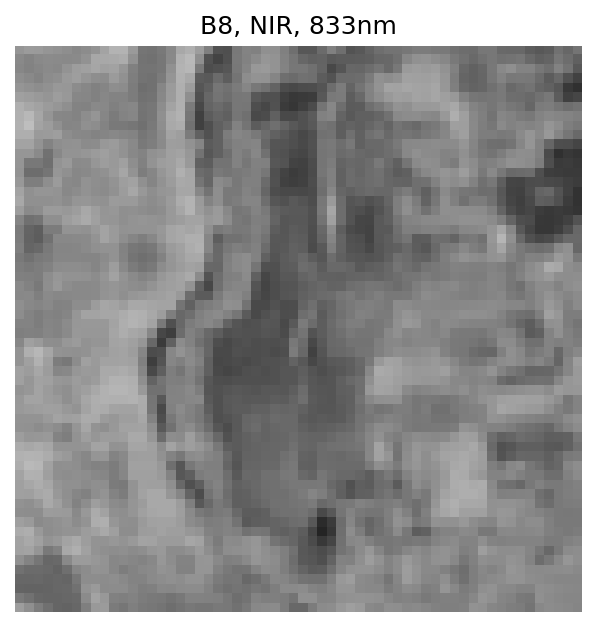

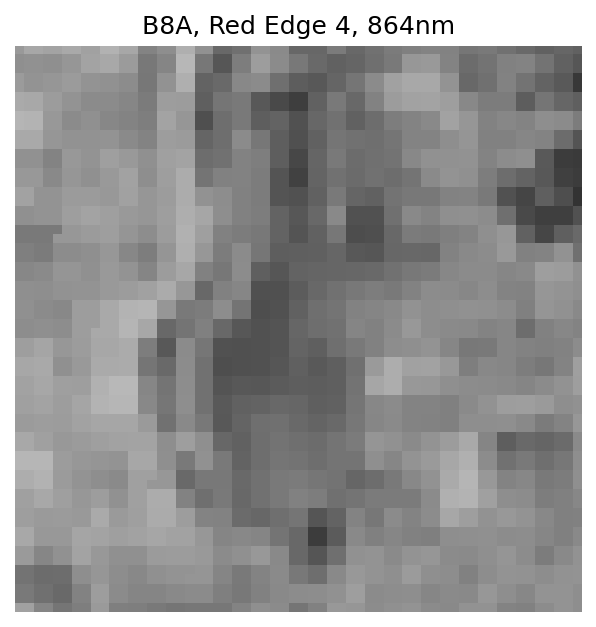

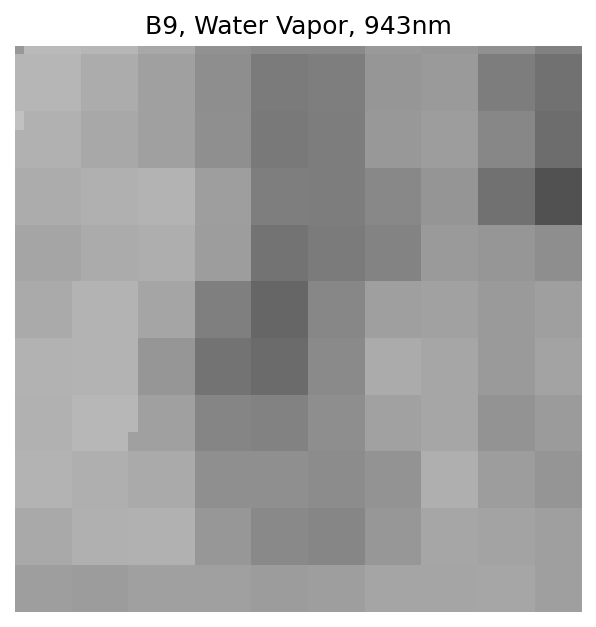

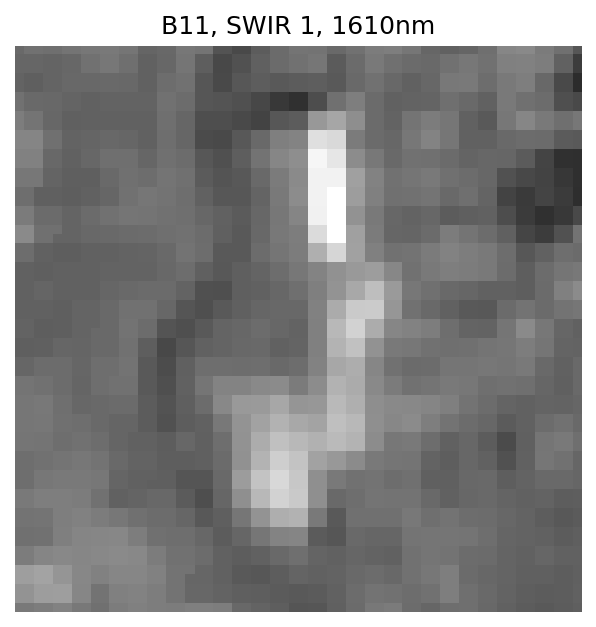

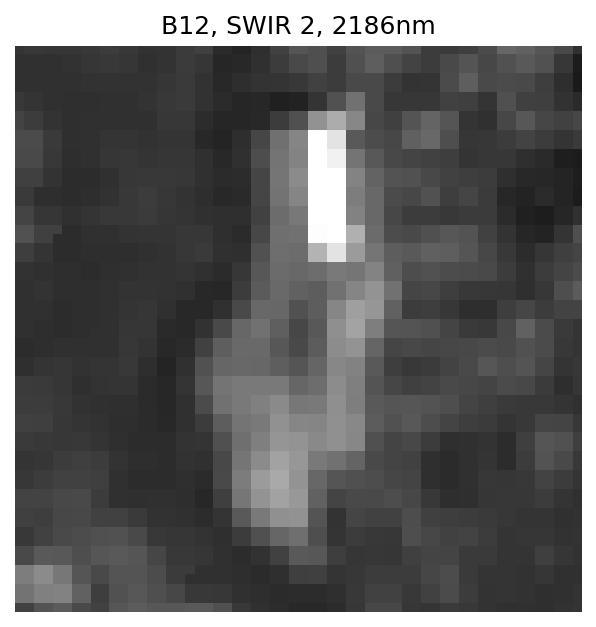

In [188]:
for band in band_descriptions:
    plt.figure(figsize=(5,5), dpi=150, facecolor=(1,1,1))
    plt.imshow(site_data[band] / (np.mean(site_data[band]) + 5 * np.std(site_data[band])), cmap='gray', vmin=0, vmax=1)
    plt.title(f"{band}, {band_descriptions[band]}")
    plt.axis('off')
    plt.savefig(f'figures/patches/hyperspectral_patches/{name}_{band}_{band_descriptions[band]}_figure.png',
               bbox_inches='tight')
    plt.show()

In [189]:
import cv2
for band in band_descriptions:
    data = 255 * site_data[band] / (np.mean(site_data[band]) + 5 * np.std(site_data[band]))
    cv2.imwrite(f'figures/patches/hyperspectral_patches/{name}_{band}_{band_descriptions[band]}_{rect_width}_patch.png', data)

In [15]:
band_combinations = {
    'rgb': ['B4', 'B3', 'B2'],
    'false_color': ['B12', 'B11', 'B4'],
    'color_infrared': ['B8', 'B4', 'B3'],
    'agriculture': ['B11', 'B8', 'B2'],
    'atmosphere': ['B12', 'B11', 'B8'],
    'healthy_vegetation': ['B8', 'B11', 'B2'],
    'land_water': ['B8', 'B11', 'B4'],
    'swir': ['B12', 'B8A', 'B4'],
    'vegetation': ['B11', 'B8', 'B4'],
    'geology': ['B12', 'B11', 'B2'],
}

In [ ]:
# Sentinel 2 band descriptions
band_descriptions = {
    'B1': 'Aerosols, 442nm',
    'B2': 'Blue, 492nm',
    'B3': 'Green, 559nm',
    'B4': 'Red, 665nm',
    'B5': 'Red Edge 1, 704nm',
    'B6': 'Red Edge 2, 739nm',
    'B7': 'Red Edge 3, 779nm',
    'B8': 'NIR, 833nm',
    'B8A': 'Red Edge 4, 864nm',
    'B9': 'Water Vapor, 943nm',
    'B11': 'SWIR 1, 1610nm',
    'B12': 'SWIR 2, 2186nm'
}

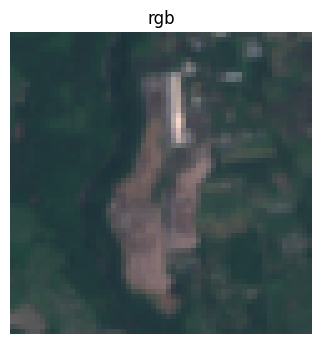

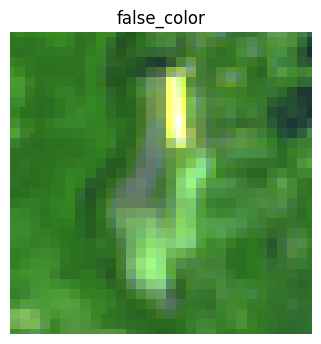

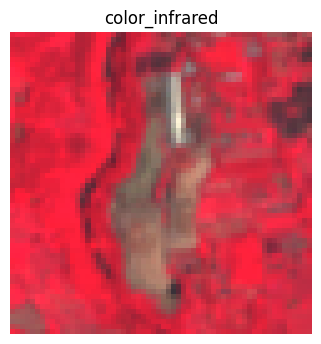

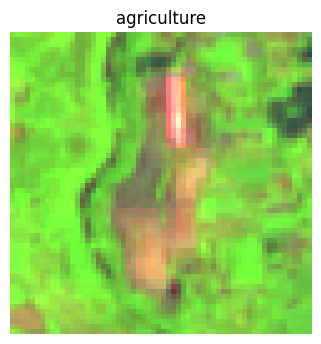

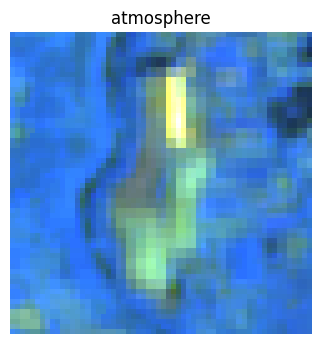

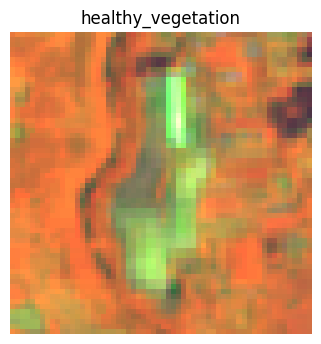

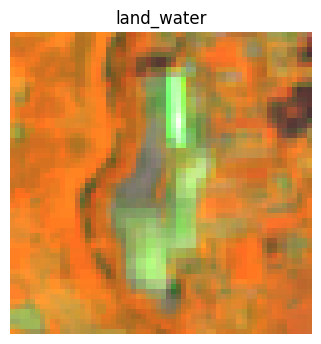

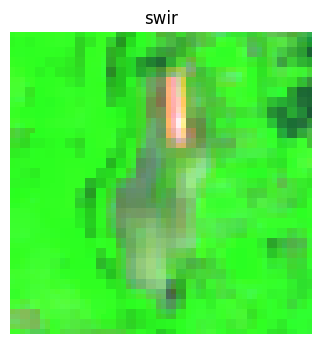

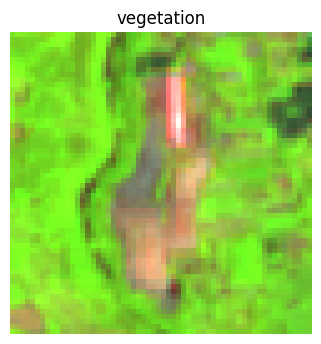

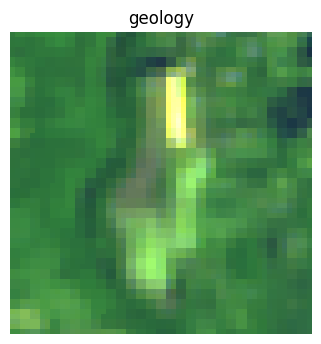

In [23]:
for combo in band_combinations:
    r = band_combinations[combo][0]
    g = band_combinations[combo][1]
    b = band_combinations[combo][2]
    composite = np.stack((site_data[r],
                site_data[g],
                site_data[b]), axis=-1)
    plt.figure(dpi=100)
    plt.imshow(np.clip((composite/4000), 0, 1), vmin=0, vmax=1)
    plt.title(combo)
    plt.axis('off')
    plt.show()

In [28]:
import cv2
for combo in band_combinations:
    r = band_combinations[combo][0]
    g = band_combinations[combo][1]
    b = band_combinations[combo][2]
    composite = np.stack((site_data[r],
                site_data[g],
                site_data[b]), axis=-1)
    composite = (composite / 4000) * 256
    cv2.imwrite(f'figures/patches/hyperspectral_patches/band_combinations/{name}_{combo}_{rect_width}_patch.png', composite)

In [31]:
import sys
sys.path.append('../')
from scripts.get_s2_data_ee import get_history, get_history_polygon, get_pixel_vectors

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
pixel_vectors = get_pixel_vectors(patch_history, '2020-11-01')

In [40]:
np.array(pixel_vectors[0])

array([[1271,  954,  974, ...,  443, 1912,  776],
       [1237,  965, 1030, ...,  541, 2075,  856],
       [1237,  973, 1028, ...,  541, 2075,  856],
       ...,
       [1285, 1066, 1074, ...,  462, 1688,  753],
       [1285, 1087, 1086, ...,  462, 1688,  753],
       [1285, 1072, 1093, ...,  462, 1730,  781]])

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_out = pca.fit_transform(pixel_vectors[0])
pca_img = np.reshape(pca_out, rgb.shape)
pca_img_norm = (pca_img - pca_img.min()) / (pca_img.max() - pca_img.min()) * 256
pca_bgr = np.stack((pca_img_norm[:,:,2], pca_img_norm[:,:,1], pca_img_norm[:,:,0]), axis=-1)
cv2.imwrite(f'figures/patches/hyperspectral_patches/band_combinations/{name}_pca_{rect_width}_patch.png', pca_img_norm)
cv2.imwrite(f'figures/patches/hyperspectral_patches/band_combinations/{name}_pca_bgr_{rect_width}_patch.png', pca_bgr)

True

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_out = tsne.fit_transform(pixel_vectors[0])
tsne_img = np.reshape(tsne_out, rgb.shape)
tsne_img_norm = (tsne_img - tsne_img.min()) / (tsne_img.max() - tsne_img.min()) * 256
tsne_bgr = np.stack((tsne_img_norm[:,:,2], tsne_img_norm[:,:,1], tsne_img_norm[:,:,0]), axis=-1)
cv2.imwrite(f'figures/patches/hyperspectral_patches/band_combinations/{name}_tsne_{rect_width}_patch.png', tsne_bgr)

True

In [65]:
tsne_bgr = np.stack((tsne_img_norm[:,:,2], tsne_img_norm[:,:,1], tsne_img_norm[:,:,0]), axis=-1)
cv2.imwrite(f'figures/patches/hyperspectral_patches/band_combinations/{name}_tsne_norm_{rect_width}_patch.png', tsne_img_norm)

True

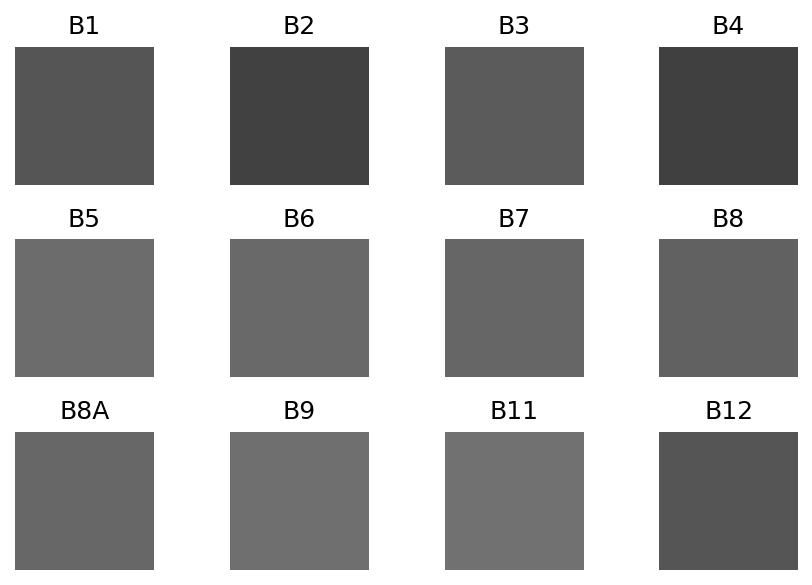

In [124]:
plt.figure(dpi=150)
for index, band in enumerate(band_descriptions):
    data = np.mean(255 * site_data[band] / (np.mean(site_data[band]) + 5 * np.std(site_data[band])))
    plt.subplot(3,4,index + 1)
    plt.imshow(np.full((10,10),data), cmap='gray', vmin=0, vmax=255)
    plt.title(band)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [120]:
plt.figure(dpi=150)
for index, band in enumerate(band_descriptions):
    data = 255 * site_data[band] / (np.mean(site_data[band]) + 5 * np.std(site_data[band]))
    pixel_mean = np.full((512,512), np.mean(data))
    cv2.imwrite(f"figures/patches/hyperspectral_patches/{band}_{band_descriptions[band].split(' ')[-1]}_mean_pixel.png", pixel_mean)

<Figure size 900x600 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


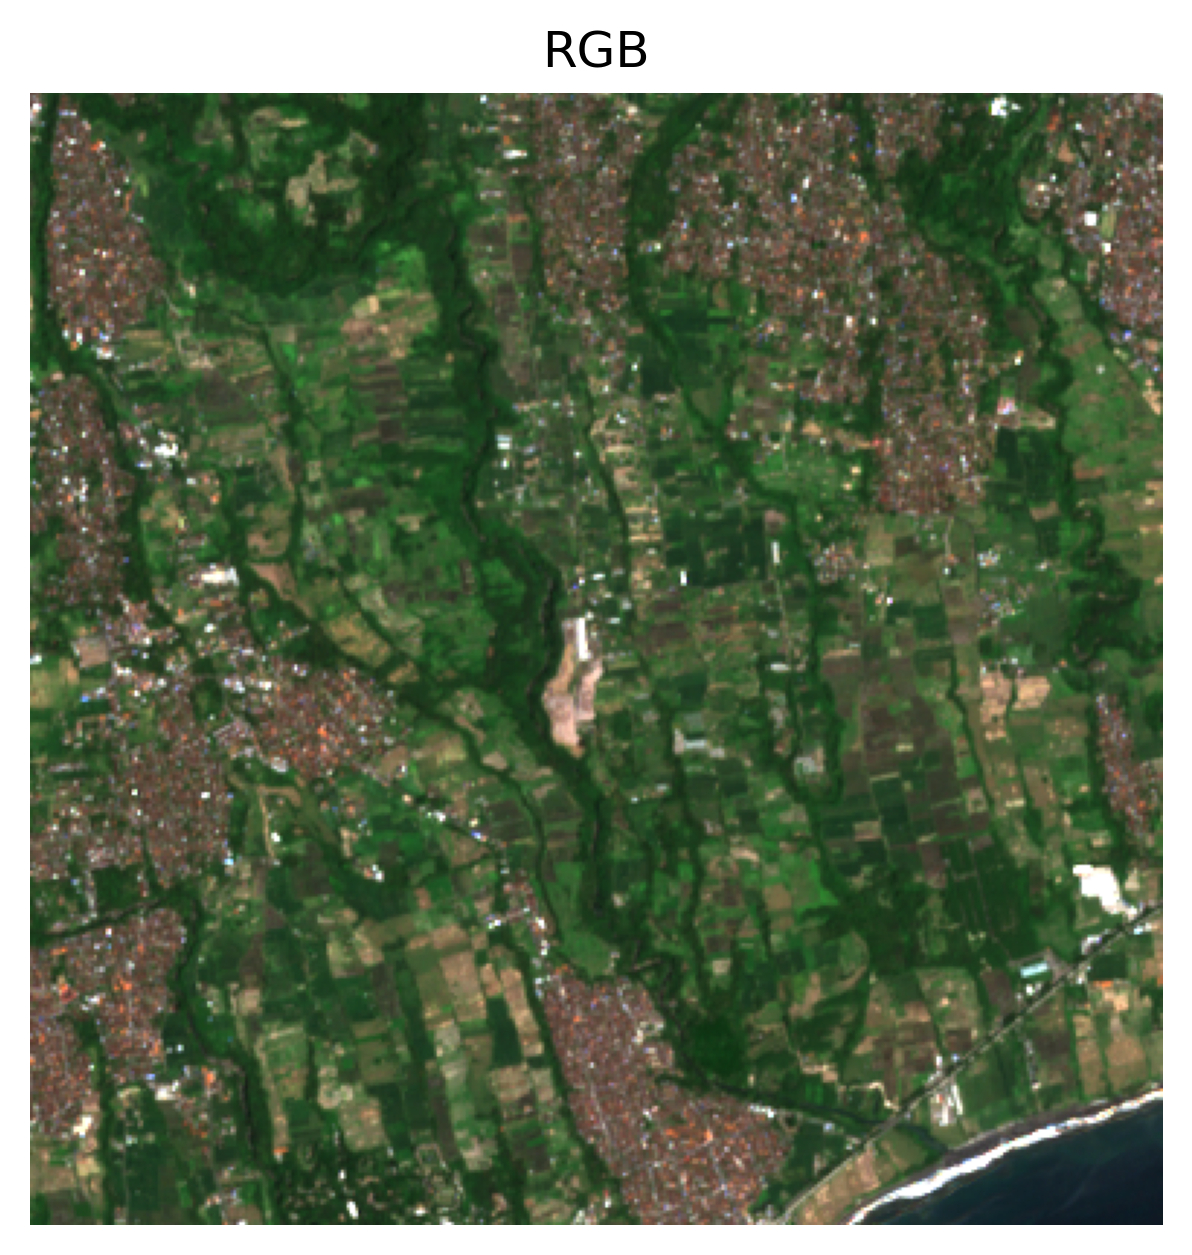

In [94]:

plt.figure(figsize=(5,5), dpi=300, facecolor=(1,1,1))
plt.imshow(rgb / (np.mean(rgb) + 5 * np.std(rgb)), vmin=0, vmax=1)
plt.title(f"RGB")
plt.axis('off')
plt.savefig(f'figures/patches/hyperspectral_patches/{name}_RGB_figure.png',
           bbox_inches='tight')
plt.show()

In [103]:
bgr = np.stack((site_data['B2'],
                site_data['B3'],
                site_data['B4']), axis=-1)
data = 255 * bgr / (np.mean(bgr) + 5 * np.std(bgr))
cv2.imwrite(f'figures/patches/hyperspectral_patches/{name}_RGB.png', data)

True